# Content Based Movie recommender Engine

In [292]:
import pandas as pd
train=pd.read_csv('netflix_titles.csv')
train

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies","When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals","A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & Musicals","In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV","Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize."


In [293]:
train['description'][7786]

'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'

In [294]:
train.shape

(7787, 12)

# Data Preprocessing

Check Null values

In [295]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Fill Null values with space

In [296]:
train["director"]= train["director"].fillna(" ")
train["cast"]=train["cast"].fillna(" ")
train["country"]=train["country"].fillna(" ")
train["date_added"]=train["date_added"].fillna(" ")
train["rating"]=train["rating"].fillna(" ")

In [297]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Convert whole name into Single name so that algorithm consider it as one name

Developing recommendation engine using cast,director,country,rating,listed_in,description.

In [298]:
train['cast'] = train['cast'].str.replace(' ','')
train['cast'] = train['cast'].str.replace(',',' ')
train["cast"]

0       JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi
1       DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato                                                                        
2       TeddChan StellaChung HenleyHii LawrenceKoh TommyKuan JoshLai MarkLee SusanLeong BenjaminLim                                                          
3       ElijahWood JohnC.Reilly JenniferConnelly ChristopherPlummer CrispinGlover MartinLandau FredTatasciore AlanOppenheimer TomKane                        
4       JimSturgess KevinSpacey KateBosworth AaronYoo LizaLapira JacobPitts LaurenceFishburne JackMcGee JoshGad SamGolzari HelenCarey JackGilpin             
                                                                          ...                                                                                
7782    ImadCreidi AntoinetteTurk EliasGergi CarmenL

In [299]:
train['country'] = train['country'].str.replace(' ','')
train['country'] = train['country'].str.replace(',',' ')
train["country"]

0       Brazil                                                
1       Mexico                                                
2       Singapore                                             
3       UnitedStates                                          
4       UnitedStates                                          
            ...                                               
7782    Sweden CzechRepublic UnitedKingdom Denmark Netherlands
7783    India                                                 
7784                                                          
7785    Australia                                             
7786    UnitedKingdom Canada UnitedStates                     
Name: country, Length: 7787, dtype: object

In [300]:
train['director'] = train['director'].str.replace(' ','')
train['director'] = train['director'].str.replace(',',' ')
train["director"]

0                      
1       JorgeMichelGrau
2       GilbertChan    
3       ShaneAcker     
4       RobertLuketic  
            ...        
7782    JosefFares     
7783    MozezSingh     
7784                   
7785                   
7786    SamDunn        
Name: director, Length: 7787, dtype: object

In [301]:
train['listed_in'] = train['listed_in'].str.replace(' ','')
train['listed_in'] = train['listed_in'].str.replace(',',' ')
train["listed_in"]

0       InternationalTVShows TVDramas TVSci-Fi&Fantasy   
1       Dramas InternationalMovies                       
2       HorrorMovies InternationalMovies                 
3       Action&Adventure IndependentMovies Sci-Fi&Fantasy
4       Dramas                                           
         ...                                             
7782    Dramas InternationalMovies                       
7783    Dramas InternationalMovies Music&Musicals        
7784    Documentaries InternationalMovies Music&Musicals 
7785    InternationalTVShows RealityTV                   
7786    Documentaries Music&Musicals                     
Name: listed_in, Length: 7787, dtype: object

In [302]:
pd.set_option('display.max_colwidth',-1) #for showing whole text

<ipython-input-302-12952f4c55e8>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1) #for showing whole text


<AxesSubplot:>

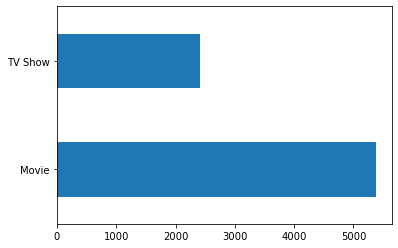

In [303]:
train['type'].value_counts().plot(kind='barh')

Separate movies & Tv shows

# Movies

In [304]:
movies = train[train['type']=='Movie'].reset_index()
movies

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,s2,Movie,7:19,JorgeMichelGrau,DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato,Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas InternationalMovies,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
1,2,s3,Movie,23:59,GilbertChan,TeddChan StellaChung HenleyHii LawrenceKoh TommyKuan JoshLai MarkLee SusanLeong BenjaminLim,Singapore,"December 20, 2018",2011,R,78 min,HorrorMovies InternationalMovies,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
2,3,s4,Movie,9,ShaneAcker,ElijahWood JohnC.Reilly JenniferConnelly ChristopherPlummer CrispinGlover MartinLandau FredTatasciore AlanOppenheimer TomKane,UnitedStates,"November 16, 2017",2009,PG-13,80 min,Action&Adventure IndependentMovies Sci-Fi&Fantasy,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
3,4,s5,Movie,21,RobertLuketic,JimSturgess KevinSpacey KateBosworth AaronYoo LizaLapira JacobPitts LaurenceFishburne JackMcGee JoshGad SamGolzari HelenCarey JackGilpin,UnitedStates,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.
4,6,s7,Movie,122,YasirAlYasiri,AminaKhalil AhmedDawood TarekLotfy AhmedElFishawy MahmoudHijazi JihaneKhalil AsmaaGalal TaraEmad,Egypt,"June 1, 2020",2019,TV-MA,95 min,HorrorMovies InternationalMovies,"After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,7781,s7782,Movie,Zoom,PeterHewitt,TimAllen CourteneyCox ChevyChase KateMara RyanNewman MichaelCassidy SpencerBreslin RipTorn KevinZegers,UnitedStates,"January 11, 2020",2006,PG,88 min,Children&FamilyMovies Comedies,"Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."
5373,7782,s7783,Movie,Zozo,JosefFares,ImadCreidi AntoinetteTurk EliasGergi CarmenLebbos ViktorAxelsson CharbelIskandar YasmineAwad,Sweden CzechRepublic UnitedKingdom Denmark Netherlands,"October 19, 2020",2005,TV-MA,99 min,Dramas InternationalMovies,"When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."
5374,7783,s7784,Movie,Zubaan,MozezSingh,VickyKaushal Sarah-JaneDias RaaghavChanana ManishChaudhary MeghnaMalik MalkeetRauni AnitaShabdish ChittaranjanTripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas InternationalMovies Music&Musicals,"A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."
5375,7784,s7785,Movie,Zulu Man in Japan,,NastyC,,"September 25, 2020",2019,TV-MA,44 min,Documentaries InternationalMovies Music&Musicals,"In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture."


In [305]:
Tv_shows = train[train['type']=='TV Show'].reset_index()
Tv_shows

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,TV Show,3%,,JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,InternationalTVShows TVDramas TVSci-Fi&Fantasy,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,5,s6,TV Show,46,SerdarAkar,ErdalBeşikçioğlu YaseminAllen MelisBirkan SaygınSoysal BerkanŞal MetinBelgin AyçaEren SelinUludoğan ÖzayFecht SunaYıldızoğlu,Turkey,"July 1, 2017",2016,TV-MA,1 Season,InternationalTVShows TVDramas TVMysteries,"A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect."
2,11,s12,TV Show,1983,,RobertWięckiewicz MaciejMusiał MichalinaOlszańska AndrzejChyra CliveRussell ZofiaWichłacz EdytaOlszówka MateuszKościukiewicz EwaBłaszczyk VuLeHong TomaszWłosok KrzysztofWach,Poland UnitedStates,"November 30, 2018",2018,TV-MA,1 Season,CrimeTVShows InternationalTVShows TVDramas,"In this dark alt-history thriller, a naïve law student and a world-weary detective uncover a conspiracy that has tyrannized Poland for decades."
3,12,s13,TV Show,1994,DiegoEnriqueOsorno,,Mexico,"May 17, 2019",2019,TV-MA,1 Season,CrimeTVShows Docuseries InternationalTVShows,"Archival video and new interviews examine Mexican politics in 1994, a year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio."
4,16,s17,TV Show,Feb-09,,ShahdElYaseen ShailaSabt Hala HanadiAl-Kandari SalmaSalem IbrahimAl-Harbi MahmoudBoushahri YousefAlBalushi Ghorour AbdullahAl-bloshi,,"March 20, 2019",2018,TV-14,1 Season,InternationalTVShows TVDramas,"As a psychology professor faces Alzheimer's, his daughter and her three close female friends experience romance, marriage, heartbreak and tragedy."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,7767,s7768,TV Show,Zindagi Gulzar Hai,,SanamSaeed FawadKhan AyeshaOmer MehreenRaheel SheheryarMunawar SaminaPeerzada WaseemAbbas JavedSheikh HinaKhawajaBayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,InternationalTVShows RomanticTVShows TVDramas,"Strong-willed, middle-class Kashaf and carefree, wealthy Zaroon meet in college, but before love can take root, they each have some growing up to do."
2406,7775,s7776,TV Show,Zoids Wild,,KenshoOno TakahiroSakurai MikakoKomatsu EtsukoKozakura SubaruKimura KaitoIshikawa AmiKoshimizu YojiIkuta HayatoKimura KotaroNishiyama TakuyaKirimoto TomokazuSeki SuzukoMimori,Japan,"August 14, 2020",2018,TV-Y7,1 Season,AnimeSeries Kids'TV,A quest for freedom and legendary treasure begins when a cheerful young adventurer follows his father's footsteps to become the greatest Zoids hunter.
2407,7777,s7778,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,Kids'TV KoreanTVShows TVComedies,"While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
2408,7779,s7780,TV Show,Zona Rosa,,ManuNNa AnaJuliaYeyé RayContreras PabloMorán,Mexico,"November 26, 2019",2019,TV-MA,1 Season,InternationalTVShows Spanish-LanguageTVShows Stand-UpComedy&TalkShows,An assortment of talent takes the stage for a night of honest stand-up featuring four of Mexico's funniest LGBTQ comedians.


In [306]:
movies = movies.drop(columns = ['duration','date_added','release_year','show_id','type','index'])
movies

,title,director,cast,country,rating,listed_in,description
0,7:19,JorgeMichelGrau,DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato,Mexico,TV-MA,Dramas InternationalMovies,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
1,23:59,GilbertChan,TeddChan StellaChung HenleyHii LawrenceKoh TommyKuan JoshLai MarkLee SusanLeong BenjaminLim,Singapore,R,HorrorMovies InternationalMovies,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
2,9,ShaneAcker,ElijahWood JohnC.Reilly JenniferConnelly ChristopherPlummer CrispinGlover MartinLandau FredTatasciore AlanOppenheimer TomKane,UnitedStates,PG-13,Action&Adventure IndependentMovies Sci-Fi&Fantasy,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
3,21,RobertLuketic,JimSturgess KevinSpacey KateBosworth AaronYoo LizaLapira JacobPitts LaurenceFishburne JackMcGee JoshGad SamGolzari HelenCarey JackGilpin,UnitedStates,PG-13,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.
4,122,YasirAlYasiri,AminaKhalil AhmedDawood TarekLotfy AhmedElFishawy MahmoudHijazi JihaneKhalil AsmaaGalal TaraEmad,Egypt,TV-MA,HorrorMovies InternationalMovies,"After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them."
...,...,...,...,...,...,...,...
5372,Zoom,PeterHewitt,TimAllen CourteneyCox ChevyChase KateMara RyanNewman MichaelCassidy SpencerBreslin RipTorn KevinZegers,UnitedStates,PG,Children&FamilyMovies Comedies,"Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain."
5373,Zozo,JosefFares,ImadCreidi AntoinetteTurk EliasGergi CarmenLebbos ViktorAxelsson CharbelIskandar YasmineAwad,Sweden CzechRepublic UnitedKingdom Denmark Netherlands,TV-MA,Dramas InternationalMovies,"When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."
5374,Zubaan,MozezSingh,VickyKaushal Sarah-JaneDias RaaghavChanana ManishChaudhary MeghnaMalik MalkeetRauni AnitaShabdish ChittaranjanTripathy,India,TV-14,Dramas InternationalMovies Music&Musicals,"A scrappy but poor boy worms his way into a tycoon's dysfunctional family, while facing his fear of music and the truth about his past."
5375,Zulu Man in Japan,,NastyC,,TV-MA,Documentaries InternationalMovies Music&Musicals,"In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture."


In [307]:
movies['combined']= movies['description']+" "+movies['director']+" "+movies['cast']+" "+movies['country']+" "+movies['rating']+" "+movies['listed_in']
movies

,title,director,cast,country,rating,listed_in,description,combined
0,7:19,JorgeMichelGrau,DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato,Mexico,TV-MA,Dramas InternationalMovies,"After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. JorgeMichelGrau DemiánBichir HéctorBonilla OscarSerrano AzaliaOrtiz OctavioMichel CarmenBeato Mexico TV-MA Dramas InternationalMovies"
1,23:59,GilbertChan,TeddChan StellaChung HenleyHii LawrenceKoh TommyKuan JoshLai MarkLee SusanLeong BenjaminLim,Singapore,R,HorrorMovies InternationalMovies,"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. GilbertChan TeddChan StellaChung HenleyHii LawrenceKoh TommyKuan JoshLai MarkLee SusanLeong BenjaminLim Singapore R HorrorMovies InternationalMovies"
2,9,ShaneAcker,ElijahWood JohnC.Reilly JenniferConnelly ChristopherPlummer CrispinGlover MartinLandau FredTatasciore AlanOppenheimer TomKane,UnitedStates,PG-13,Action&Adventure IndependentMovies Sci-Fi&Fantasy,"In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. ShaneAcker ElijahWood JohnC.Reilly JenniferConnelly ChristopherPlummer CrispinGlover MartinLandau FredTatasciore AlanOppenheimer TomKane UnitedStates PG-13 Action&Adventure IndependentMovies Sci-Fi&Fantasy"
3,21,RobertLuketic,JimSturgess KevinSpacey KateBosworth AaronYoo LizaLapira JacobPitts LaurenceFishburne JackMcGee JoshGad SamGolzari HelenCarey JackGilpin,UnitedStates,PG-13,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. RobertLuketic JimSturgess KevinSpacey KateBosworth AaronYoo LizaLapira JacobPitts LaurenceFishburne JackMcGee JoshGad SamGolzari HelenCarey JackGilpin UnitedStates PG-13 Dramas
4,122,YasirAlYasiri,AminaKhalil AhmedDawood TarekLotfy AhmedElFishawy MahmoudHijazi JihaneKhalil AsmaaGalal TaraEmad,Egypt,TV-MA,HorrorMovies InternationalMovies,"After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them.","After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them. YasirAlYasiri AminaKhalil AhmedDawood TarekLotfy AhmedElFishawy MahmoudHijazi JihaneKhalil AsmaaGalal TaraEmad Egypt TV-MA HorrorMovies InternationalMovies"
...,...,...,...,...,...,...,...,...
5372,Zoom,PeterHewitt,TimAllen CourteneyCox ChevyChase KateMara RyanNewman MichaelCassidy SpencerBreslin RipTorn KevinZegers,UnitedStates,PG,Children&FamilyMovies Comedies,"Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain.","Dragged from civilian life, a former superhero must train a new crop of youthful saviors when the military preps for an attack by a familiar villain. PeterHewitt TimAllen CourteneyCox ChevyChase KateMara RyanNewman MichaelCassidy SpencerBreslin RipTorn KevinZegers UnitedStates PG Children&FamilyMovies Comedies"
5373,Zozo,JosefFares,ImadCreidi AntoinetteTurk EliasGergi CarmenLebbos ViktorAxelsson CharbelIskandar YasmineAw

First i will apply Bag of words and then will use cosine_similarity for similarity scores with other items.

In [308]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(analyzer='word',stop_words='english')
count_matrix = count.fit_transform(movies['combined'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [309]:
print(count_matrix.shape)

(5377, 42026)


In [310]:
cosine_sim

array([[1.        , 0.03573708, 0.        , ..., 0.09847982, 0.20261022,
        0.07918076],
       [0.03573708, 1.        , 0.        , ..., 0.03402069, 0.04199605,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.03031695, 0.        ,
        0.03656362],
       ...,
       [0.09847982, 0.03402069, 0.03031695, ..., 1.        , 0.19287919,
        0.15075567],
       [0.20261022, 0.04199605, 0.        , ..., 0.19287919, 1.        ,
        0.27914526],
       [0.07918076, 0.        , 0.03656362, ..., 0.15075567, 0.27914526,
        1.        ]])

In [311]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()
indices

title
7:19                                       0   
23:59                                      1   
9                                          2   
21                                         3   
122                                        4   
                                          ..   
Zoom                                       5372
Zozo                                       5373
Zubaan                                     5374
Zulu Man in Japan                          5375
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    5376
Length: 5377, dtype: int64

In [312]:
def recommendation(title):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1],reverse=True)
    scores=sim_scores[1:11]
    movie_indices=[i[0] for i in scores]
    return movies['title'].iloc[movie_indices]

In [313]:
recommendation('Zulu Man in Japan')

5181    We Are One                               
1400    Emicida: AmarElo - It’s All For Yesterday
3498    Quincy                                   
3672    Roots                                    
4265    The Black Godfather                      
2880    Miss Sharon Jones!                       
5164    Wandering Stars                          
1024    Clive Davis: The Soundtrack of Our Lives 
2826    Mexicanos de Bronce                      
1695    GIMS: On the Record                      
Name: title, dtype: object

In [314]:
recommendation('Sanju')

767     Bollywood Calling
2684    Made in China    
2666    Lust Stories     
3845    Seven (Tamil)    
2770    Maska            
2981    Mumbai Meri Jaan 
3444    Prague           
1691    Ghulam-E-Musthafa
3399    PK               
283     AK vs AK         
Name: title, dtype: object

# TV shows

In [315]:
tv_shows = Tv_shows.drop(columns = ['duration','date_added','release_year','show_id','type','index'])
tv_shows

,title,director,cast,country,rating,listed_in,description
0,3%,,JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi,Brazil,TV-MA,InternationalTVShows TVDramas TVSci-Fi&Fantasy,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
1,46,SerdarAkar,ErdalBeşikçioğlu YaseminAllen MelisBirkan SaygınSoysal BerkanŞal MetinBelgin AyçaEren SelinUludoğan ÖzayFecht SunaYıldızoğlu,Turkey,TV-MA,InternationalTVShows TVDramas TVMysteries,"A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect."
2,1983,,RobertWięckiewicz MaciejMusiał MichalinaOlszańska AndrzejChyra CliveRussell ZofiaWichłacz EdytaOlszówka MateuszKościukiewicz EwaBłaszczyk VuLeHong TomaszWłosok KrzysztofWach,Poland UnitedStates,TV-MA,CrimeTVShows InternationalTVShows TVDramas,"In this dark alt-history thriller, a naïve law student and a world-weary detective uncover a conspiracy that has tyrannized Poland for decades."
3,1994,DiegoEnriqueOsorno,,Mexico,TV-MA,CrimeTVShows Docuseries InternationalTVShows,"Archival video and new interviews examine Mexican politics in 1994, a year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio."
4,Feb-09,,ShahdElYaseen ShailaSabt Hala HanadiAl-Kandari SalmaSalem IbrahimAl-Harbi MahmoudBoushahri YousefAlBalushi Ghorour AbdullahAl-bloshi,,TV-14,InternationalTVShows TVDramas,"As a psychology professor faces Alzheimer's, his daughter and her three close female friends experience romance, marriage, heartbreak and tragedy."
...,...,...,...,...,...,...,...
2405,Zindagi Gulzar Hai,,SanamSaeed FawadKhan AyeshaOmer MehreenRaheel SheheryarMunawar SaminaPeerzada WaseemAbbas JavedSheikh HinaKhawajaBayat,Pakistan,TV-PG,InternationalTVShows RomanticTVShows TVDramas,"Strong-willed, middle-class Kashaf and carefree, wealthy Zaroon meet in college, but before love can take root, they each have some growing up to do."
2406,Zoids Wild,,KenshoOno TakahiroSakurai MikakoKomatsu EtsukoKozakura SubaruKimura KaitoIshikawa AmiKoshimizu YojiIkuta HayatoKimura KotaroNishiyama TakuyaKirimoto TomokazuSeki SuzukoMimori,Japan,TV-Y7,AnimeSeries Kids'TV,A quest for freedom and legendary treasure begins when a cheerful young adventurer follows his father's footsteps to become the greatest Zoids hunter.
2407,Zombie Dumb,,,,TV-Y7,Kids'TV KoreanTVShows TVComedies,"While living alone in a spooky town, a young girl befriends a motley crew of zombie children with diverse personalities."
2408,Zona Rosa,,ManuNNa AnaJuliaYeyé RayContreras PabloMorán,Mexico,TV-MA,InternationalTVShows Spanish-LanguageTVShows Stand-UpComedy&TalkShows,An assortment of talent takes the stage for a night of honest stand-up featuring four of Mexico's funniest LGBTQ comedians.


In [316]:
tv_shows['combined']= tv_shows['description']+" "+tv_shows['director']+" "+tv_shows['cast']+" "+tv_shows['country']+" "+tv_shows['rating']+" "+tv_shows['listed_in']
tv_shows

,title,director,cast,country,rating,listed_in,description,combined
0,3%,,JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi,Brazil,TV-MA,InternationalTVShows TVDramas TVSci-Fi&Fantasy,"In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. JoãoMiguel BiancaComparato MichelGomes RodolfoValente VanezaOliveira RafaelLozano VivianePorto MelFronckowiak SergioMamberti ZezéMotta CelsoFrateschi Brazil TV-MA InternationalTVShows TVDramas TVSci-Fi&Fantasy"
1,46,SerdarAkar,ErdalBeşikçioğlu YaseminAllen MelisBirkan SaygınSoysal BerkanŞal MetinBelgin AyçaEren SelinUludoğan ÖzayFecht SunaYıldızoğlu,Turkey,TV-MA,InternationalTVShows TVDramas TVMysteries,"A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.","A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. SerdarAkar ErdalBeşikçioğlu YaseminAllen MelisBirkan SaygınSoysal BerkanŞal MetinBelgin AyçaEren SelinUludoğan ÖzayFecht SunaYıldızoğlu Turkey TV-MA InternationalTVShows TVDramas TVMysteries"
2,1983,,RobertWięckiewicz MaciejMusiał MichalinaOlszańska AndrzejChyra CliveRussell ZofiaWichłacz EdytaOlszówka MateuszKościukiewicz EwaBłaszczyk VuLeHong TomaszWłosok KrzysztofWach,Poland UnitedStates,TV-MA,CrimeTVShows InternationalTVShows TVDramas,"In this dark alt-history thriller, a naïve law student and a world-weary detective uncover a conspiracy that has tyrannized Poland for decades.","In this dark alt-history thriller, a naïve law student and a world-weary detective uncover a conspiracy that has tyrannized Poland for decades. RobertWięckiewicz MaciejMusiał MichalinaOlszańska AndrzejChyra CliveRussell ZofiaWichłacz EdytaOlszówka MateuszKościukiewicz EwaBłaszczyk VuLeHong TomaszWłosok KrzysztofWach Poland UnitedStates TV-MA CrimeTVShows InternationalTVShows TVDramas"
3,1994,DiegoEnriqueOsorno,,Mexico,TV-MA,CrimeTVShows Docuseries InternationalTVShows,"Archival video and new interviews examine Mexican politics in 1994, a year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio.","Archival video and new interviews examine Mexican politics in 1994, a year marked by the rise of the EZLN and the assassination of Luis Donaldo Colosio. DiegoEnriqueOsorno Mexico TV-MA CrimeTVShows Docuseries InternationalTVShows"
4,Feb-09,,ShahdElYaseen ShailaSabt Hala HanadiAl-Kandari SalmaSalem IbrahimAl-Harbi MahmoudBoushahri YousefAlBalushi Ghorour AbdullahAl-bloshi,,TV-14,InternationalTVShows TVDramas,"As a psychology professor faces Alzheimer's, his daughter and her three close female friends experience romance, marriage, heartbreak and tragedy.","As a psychology professor faces Alzheimer's, his daughter and her three close female friends experience romance, marriage, heartbreak and tragedy. ShahdElYaseen ShailaSabt Hala HanadiAl-Kandari SalmaSalem IbrahimAl-Harbi MahmoudBoushahri YousefAlBalushi Ghorour AbdullahAl-bloshi TV-14 InternationalTVShows TVDramas"
...,...,...,...,...,...,...,...,...
2405,Zindagi Gulzar Hai,,SanamSaeed FawadKhan AyeshaOmer MehreenRaheel SheheryarMunawar SaminaPeerzada WaseemAbbas JavedSheikh HinaKhawajaBayat,Pakistan,TV-PG,InternationalTVShows RomanticTVShows TVDramas,"Strong-willed, middle-class Kashaf and carefree, wealthy Zaroon meet in college, but before love can take root, they each have some growing up to do.","Strong-willed, middle-class Kashaf and carefree, wealthy Zaroon meet in college, but before love can take root, they each have some growing up to do. SanamSaeed FawadKhan AyeshaOmer MehreenRaheel SheheryarMunawar SaminaPeerzada WaseemAbbas

In [317]:
count_matrix1 = count.fit_transform(tv_shows['combined'])
print(count_matrix1.shape)

(2410, 23653)


In [318]:
cosine_sim = cosine_similarity(count_matrix1, count_matrix1)
cosine_sim

array([[1.        , 0.13116517, 0.11973687, ..., 0.08032193, 0.1000556 ,
        0.07490059],
       [0.13116517, 1.        , 0.12171612, ..., 0.08164966, 0.10170953,
        0.0761387 ],
       [0.11973687, 0.12171612, 1.        , ..., 0.0745356 , 0.09284767,
        0.0695048 ],
       ...,
       [0.08032193, 0.08164966, 0.0745356 , ..., 1.        , 0.08304548,
        0.09325048],
       [0.1000556 , 0.10170953, 0.09284767, ..., 0.08304548, 1.        ,
        0.07744031],
       [0.07490059, 0.0761387 , 0.0695048 , ..., 0.09325048, 0.07744031,
        1.        ]])

In [319]:
indices = pd.Series(tv_shows.index, index=tv_shows['title']).drop_duplicates()
indices

title
3%                       0   
46                       1   
1983                     2   
1994                     3   
Feb-09                   4   
                        ..   
Zindagi Gulzar Hai       2405
Zoids Wild               2406
Zombie Dumb              2407
Zona Rosa                2408
Zumbo's Just Desserts    2409
Length: 2410, dtype: int64

In [320]:
def recommendation(title):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1],reverse=True)
    scores=sim_scores[1:11]
    tv_shows_indices=[i[0] for i in scores]
    return tv_shows['title'].iloc[tv_shows_indices]

In [321]:
recommendation('Friends')

598     Episodes                                
1221    Melodies of Life - Born This Way        
652     Find Yourself                           
1327    Mystery Science Theater 3000: The Return
1461    Pee-wee's Playhouse                     
460     Dad's Army                              
832     High Score                              
1175    Making a Murderer                       
722     Girlfriends                             
1559    Real Rob                                
Name: title, dtype: object

In [322]:
recommendation("Crash Landing on You")

1321    My Sassy Girl                
1649    Secret Affair                
319     Can We Get Married?          
1604    Romance is a bonus book      
198     Because This Is My First Life
195     Beating Again                
367     Chicago Typewriter           
2343    When the Camellia Blooms     
826     Hi Bye, Mama!                
1272    MONKART                      
Name: title, dtype: object